## Project 2: SMS Spam detection 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re # regular expression for pattern matching
import string # dealing with string operation
import nltk # for text processing
from nltk.corpus import stopwords

In [2]:
#load the dataset
spam_df = pd.read_csv("spam1.csv")

In [3]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## EDA

In [4]:
#removing unknown column
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
spam_df = spam_df.rename(columns = {'v1':'Label','v2':'SMS'})

In [7]:
spam_df.groupby('Label').count()

,SMS
Label,
ham,4825
spam,747


In [8]:
spam_df.describe()

,Label,SMS
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
# checking null values
spam_df.isna().sum()

Label    0
SMS      0
dtype: int64

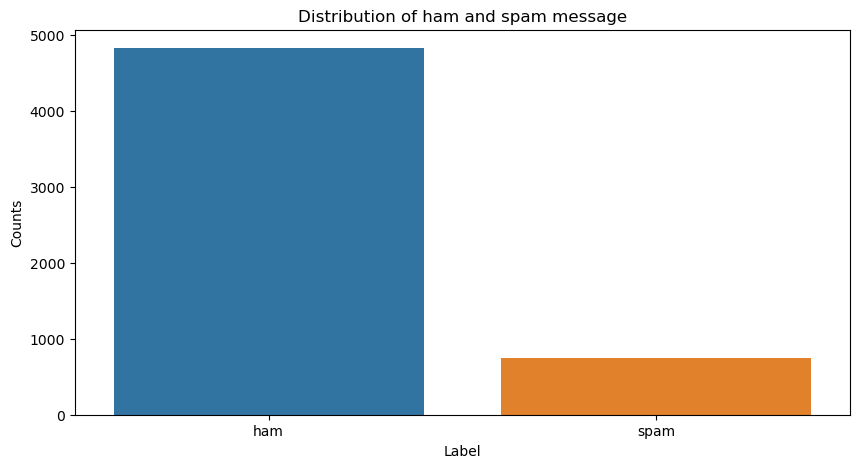

In [10]:
#visulaize 
plt.figure(figsize=(10,5))
sns.countplot(x='Label',data = spam_df)
plt.ylabel('Counts')
plt.title('Distribution of ham and spam message')
plt.show();

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam_df['Label'] = encoder.fit_transform(spam_df['Label'])

In [14]:
spam_df

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Data  Preprocessing  

In [15]:
def preprocess_text(text):
    text = text.lower()
    #removing special characters and digits using re
    text = re.sub('r\d','',text)#remove digits
    text =re.sub('r[^\w\s]','',text)#remove special character
    
    #tokenize the text
    token = nltk.word_tokenize(text)
    return token

In [16]:
# let's remove stopwords like 'the', 'is',..
def remove_stopwords(tokens):
    # import stopwords from nltk library for english language and convert into set dat structure
    stop_words = set(stopwords.words('english'))
    #filtering words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens                              
                            

In [17]:
#let's change the words like ( dance, dancer,dances,dancing) into (dance)
def perform_lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [18]:
#let's combine all function together
def clean_text(text):
    tokens = preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = perform_lemmatization(filtered_tokens)
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

In [19]:
#apply cleaning the text into dataset
spam_df['SMS'] = spam_df['SMS'].apply(clean_text)

In [20]:
spam_df.head(5)

,Label,SMS
0,0,"go jurong point , crazy .. available bugis n g..."
1,0,ok la .. joking wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early ho .. u c already say ...
4,0,"nah n't think go usf , life around though"


## Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [22]:
X = tfidf.fit_transform(spam_df['SMS']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y = spam_df['Label'].values

In [24]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test,y_pred)

In [32]:
print("Accuracy:", acs * 100)

Accuracy: 97.9372197309417
